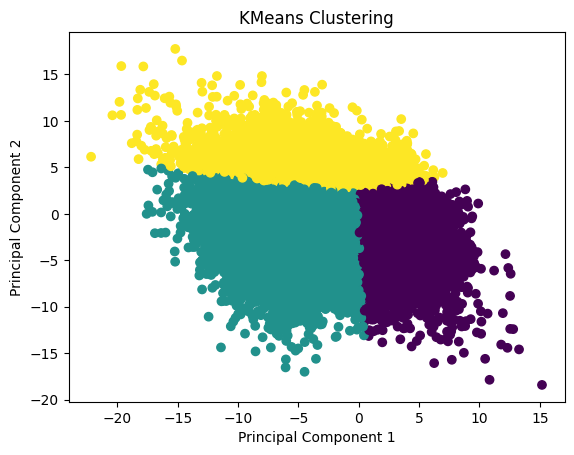

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from data_processing import clean_combined_data

# Load and clean the data
combined_data = clean_combined_data('harth')

X = combined_data.drop(columns=['label', 'timestamp'])  
X_scaled = StandardScaler().fit_transform(X)

# dimensionality
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

 #number of clusters
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans_labels = kmeans.fit_predict(X_pca)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


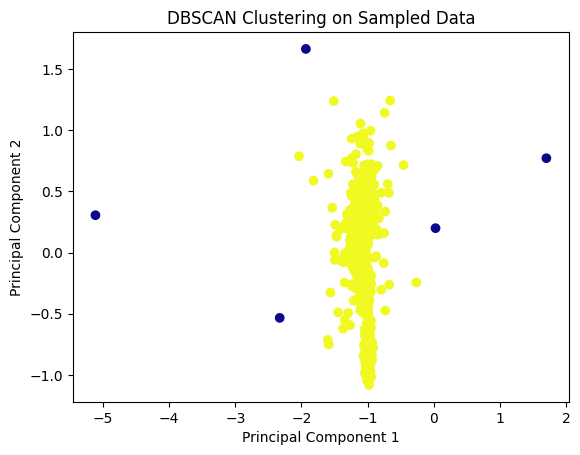

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

sample_size = 10000 
X_sample = X_pca[:sample_size]

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sample)

plt.scatter(X_sample[:, 0], X_sample[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering on Sampled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

sample_size = 10000  
X_sample = X_pca[:sample_size]
kmeans_labels_sample = kmeans_labels[:sample_size]
dbscan_labels_sample = dbscan_labels[:sample_size]

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(X_sample, kmeans_labels_sample)
dbscan_silhouette = silhouette_score(X_sample, dbscan_labels_sample)

print(f'KMeans Silhouette Score (sampled): {kmeans_silhouette:.4f}')
print(f'DBSCAN Silhouette Score (sampled): {dbscan_silhouette:.4f}')


KMeans Silhouette Score (sampled): 0.9161
DBSCAN Silhouette Score (sampled): 0.9243
